In [1]:
import torch
import numpy as np
import torch.nn as nn
from sklearn import datasets
from matplotlib import pyplot as plt

In [ ]:
x=torch.zeros(4)

In [ ]:
x

In [ ]:
x=torch.ones(2,3)

In [ ]:
x

In [ ]:
x=torch.rand(5,7)

In [ ]:
x

### Broadcasting method

In [ ]:
x=x*5

In [ ]:
#inplace function(add,sub,div,mul...)
x.mul_(x)

In [ ]:
x

In [ ]:
a=torch.tensor([[2,5,8],[5,7,3],[6,8,4]])

In [ ]:
a

In [ ]:
b=torch.tensor([[3,7,8],[1,6,2],[5,9,4]])

In [ ]:
r1=a+b

In [ ]:
torch.add(a,b)

In [ ]:
r1

In [ ]:
r2=a-b
r2

In [ ]:
r2.dtype

In [ ]:
r2.size()

In [ ]:
#dvodimenzionalna matrica sa jednim redom i devet kolona
r2.view(1,9)

In [ ]:
n=r2.numpy()

In [ ]:
n

In [ ]:
r2

In [ ]:
n=n*37

In [ ]:
n

In [ ]:
r2

In [ ]:
r3=torch.from_numpy(n)

In [ ]:
r3

In [ ]:
r3[:,1] #! levo su redovi, desno kolone

In [ ]:
l=[2,3,4,4]

In [ ]:
l[:]

Autograd

In [7]:
A=torch.rand(3,requires_grad=True)

In [8]:
A

tensor([0.7188, 0.0642, 0.9983], requires_grad=True)

In [9]:
B=2*A

In [10]:
C=2*B

In [24]:
C.sum()

tensor(7.1253, grad_fn=<SumBackward0>)

In [11]:
C

tensor([2.8752, 0.2568, 3.9933], grad_fn=<MulBackward0>)

In [12]:
V=torch.tensor([1,0.001,1])

In [13]:
V

tensor([1.0000, 0.0010, 1.0000])

In [14]:
C.backward(V)

In [15]:
A.grad

tensor([4.0000, 0.0040, 4.0000])

In [ ]:
A.grad.zero_()

In [22]:
w=torch.ones(4, requires_grad=True)

In [28]:
w.grad.zero_()

tensor([0., 0., 0., 0.])

In [29]:
for _ in range (3):
    z=w.sum()
    z.backward()
    print(w.grad)
    w.grad.zero_()

tensor([1., 1., 1., 1.])
tensor([1., 1., 1., 1.])
tensor([1., 1., 1., 1.])


In [64]:
x=torch.rand(3,requires_grad=True)
y=2*x
z=2*y

In [65]:
x

tensor([0.2180, 0.4387, 0.2472], requires_grad=True)

In [66]:
y

tensor([0.4361, 0.8775, 0.4944], grad_fn=<MulBackward0>)

In [67]:
z

tensor([0.8722, 1.7549, 0.9888], grad_fn=<MulBackward0>)

In [68]:
m=z.mean()
n=z.sum()

In [69]:
n.backward()

In [70]:
x.grad

tensor([4., 4., 4.])

In [63]:
x.grad.zero_()

tensor([0., 0., 0.])

In [7]:
x = torch.tensor(4., requires_grad = True)
y = torch.tensor(-3., requires_grad = True)
z = torch.tensor(5., requires_grad = True)
q = x + y
f = q * z
f.backward()


In [6]:
int(x)

4

x1=4, y1=-3,z1=5,q1=1,f1=5

dx=1
x2=5,y2=-3,z2=5,q2=2,f2=10
df=5
x.grad=5 #parcijalni izvod df/dx

dy=1
x3=4,y3=-2,z3=5,q3=2,f3=10
df=5
y.grad=5

dz=1
x4=4, y4=-3,z4=6,q4=1,f4=6
df=1 (za koliko se promenilo pocetno f)
z.grad=1

In [11]:
x.grad

tensor(5.)

In [12]:
y.grad

tensor(5.)

In [13]:
z.grad

tensor(1.)

Loss Function = (H-Y)^2 = (WX-Y)^2

In [4]:
x=torch.tensor(1.0)

In [5]:
y=torch.tensor(2.0)

In [6]:
w=torch.tensor(1.0, requires_grad = True)

In [7]:
h=w*x

In [8]:
h

tensor(1., grad_fn=<MulBackward0>)

In [9]:
loss=(h-y)**2

In [10]:
loss

tensor(1., grad_fn=<PowBackward0>)

In [12]:
loss.backward()

In [13]:
w.grad

tensor(-2.)

Linear regression - numpy

In [22]:
X=np.array([1,2,3,4], dtype=np.float32)

In [24]:
Y=np.array([2,4,6,8], dtype=np.float32)

In [31]:
Y*X

array([ 2.,  8., 18., 32.], dtype=float32)

In [29]:
((w*X-Y)**2).mean()

30.0

In [25]:
w=0

In [26]:
#racuna hipoteticke vrednosti
def forward(X):
    return w*X

In [30]:
#min los funkcije
def loss(Y,H):
    return ((H-Y)**2).mean()

kako se menja loss sa promenom tezine(w)
d.loss/dw=sum(H-Y)*2x//N(br tacka)

In [32]:
def gradient(X,Y,H):
    return (2*X*(H-Y)).mean()

In [34]:
print(f"prediction before training: {forward(5)}")

prediction before training: 0


In [44]:
learning_rate=0.1

In [45]:
num_iters=100

In [46]:
for epoch in range(num_iters):
    H=forward(X)
    L=loss(Y,H)
    dw=gradient(X,Y,H)
    #w=w-dw*learning_rate
    w-=dw*learning_rate
    if epoch%1==0:
        print(f"epoch: {epoch+1}, w={w:.3f},loss={L:.4f}")
        

epoch: 1, w=2.000,loss=0.0000
epoch: 2, w=2.000,loss=0.0000
epoch: 3, w=2.000,loss=0.0000
epoch: 4, w=2.000,loss=0.0000
epoch: 5, w=2.000,loss=0.0000
epoch: 6, w=2.000,loss=0.0000
epoch: 7, w=2.000,loss=0.0000
epoch: 8, w=2.000,loss=0.0000
epoch: 9, w=2.000,loss=0.0000
epoch: 10, w=2.000,loss=0.0000
epoch: 11, w=2.000,loss=0.0000
epoch: 12, w=2.000,loss=0.0000
epoch: 13, w=2.000,loss=0.0000
epoch: 14, w=2.000,loss=0.0000
epoch: 15, w=2.000,loss=0.0000
epoch: 16, w=2.000,loss=0.0000
epoch: 17, w=2.000,loss=0.0000
epoch: 18, w=2.000,loss=0.0000
epoch: 19, w=2.000,loss=0.0000
epoch: 20, w=2.000,loss=0.0000
epoch: 21, w=2.000,loss=0.0000
epoch: 22, w=2.000,loss=0.0000
epoch: 23, w=2.000,loss=0.0000
epoch: 24, w=2.000,loss=0.0000
epoch: 25, w=2.000,loss=0.0000
epoch: 26, w=2.000,loss=0.0000
epoch: 27, w=2.000,loss=0.0000
epoch: 28, w=2.000,loss=0.0000
epoch: 29, w=2.000,loss=0.0000
epoch: 30, w=2.000,loss=0.0000
epoch: 31, w=2.000,loss=0.0000
epoch: 32, w=2.000,loss=0.0000
epoch: 33, w=2.00

In [47]:
print(f"prediction after training: {forward(5)}")

prediction after training: 9.999999783635136


Linear regression u pytorch-u

In [57]:
learning_rate=0.1

In [58]:
num_iters=100

In [59]:
X=torch.tensor([1,2,3,4], dtype=torch.float32)

In [60]:
Y=torch.tensor([2,4,6,8], dtype=torch.float32)

In [61]:
w=torch.tensor(0.0,dtype=torch.float32,requires_grad = True)

In [62]:
def forward(X):
    return w*X

In [63]:
def loss(Y,H):
    return ((H-Y)**2).mean()

In [64]:
print(f"prediction before training: {forward(5)}")

prediction before training: 0.0


In [65]:
for epoch in range(num_iters):
    H=forward(X)
    L=loss(Y,H)
    L.backward()
    with torch.no_grad():
        w-=learning_rate*w.grad
    w.grad.zero_() #impalce method(radi to na sebi)
    if epoch%1==0:
        print(f"epoch: {epoch+1}, w={w:.3f},loss={L:.4f}")
        

epoch: 1, w=3.000,loss=30.0000
epoch: 2, w=1.500,loss=7.5000
epoch: 3, w=2.250,loss=1.8750
epoch: 4, w=1.875,loss=0.4688
epoch: 5, w=2.062,loss=0.1172
epoch: 6, w=1.969,loss=0.0293
epoch: 7, w=2.016,loss=0.0073
epoch: 8, w=1.992,loss=0.0018
epoch: 9, w=2.004,loss=0.0005
epoch: 10, w=1.998,loss=0.0001
epoch: 11, w=2.001,loss=0.0000
epoch: 12, w=2.000,loss=0.0000
epoch: 13, w=2.000,loss=0.0000
epoch: 14, w=2.000,loss=0.0000
epoch: 15, w=2.000,loss=0.0000
epoch: 16, w=2.000,loss=0.0000
epoch: 17, w=2.000,loss=0.0000
epoch: 18, w=2.000,loss=0.0000
epoch: 19, w=2.000,loss=0.0000
epoch: 20, w=2.000,loss=0.0000
epoch: 21, w=2.000,loss=0.0000
epoch: 22, w=2.000,loss=0.0000
epoch: 23, w=2.000,loss=0.0000
epoch: 24, w=2.000,loss=0.0000
epoch: 25, w=2.000,loss=0.0000
epoch: 26, w=2.000,loss=0.0000
epoch: 27, w=2.000,loss=0.0000
epoch: 28, w=2.000,loss=0.0000
epoch: 29, w=2.000,loss=0.0000
epoch: 30, w=2.000,loss=0.0000
epoch: 31, w=2.000,loss=0.0000
epoch: 32, w=2.000,loss=0.0000
epoch: 33, w=2.0

In [66]:
print(f"prediction after training: {forward(5)}")

prediction after training: 10.0


Linear regression nn

In [68]:
X=torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)

In [69]:
Y=torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

In [70]:
x_test=torch.tensor([5], dtype=torch.float32)

In [71]:
n_samples,n_features=X.shape

In [72]:
X.shape

torch.Size([4, 1])

In [74]:
input_size=n_features

In [75]:
output_size=1

In [76]:
model=nn.Linear(input_size,output_size)

In [86]:
print(f"prediction before training: {model(x_test).item():.3f}")

prediction before training: 9.968


In [78]:
learning_rate=0.1

In [79]:
num_iters=100

In [80]:
loss=nn.MSELoss() #meansquarerros

In [81]:
optimazer=torch.optim.SGD(model.parameters(),lr=learning_rate) #stohastiht gradient 

In [82]:
for epoch in range(num_iters):
    H=model(X)
    L=loss(Y,H)
    L.backward()
    optimazer.step()
    optimazer.zero_grad()
    if epoch%1==0:
        print(f"epoch: {epoch+1},loss={L:.4f}")

epoch: 1, w=2.000,loss=53.1767
epoch: 2, w=2.000,loss=23.9482
epoch: 3, w=2.000,loss=10.8208
epoch: 4, w=2.000,loss=4.9228
epoch: 5, w=2.000,loss=2.2709
epoch: 6, w=2.000,loss=1.0767
epoch: 7, w=2.000,loss=0.5372
epoch: 8, w=2.000,loss=0.2917
epoch: 9, w=2.000,loss=0.1786
epoch: 10, w=2.000,loss=0.1249
epoch: 11, w=2.000,loss=0.0982
epoch: 12, w=2.000,loss=0.0838
epoch: 13, w=2.000,loss=0.0749
epoch: 14, w=2.000,loss=0.0687
epoch: 15, w=2.000,loss=0.0639
epoch: 16, w=2.000,loss=0.0598
epoch: 17, w=2.000,loss=0.0561
epoch: 18, w=2.000,loss=0.0527
epoch: 19, w=2.000,loss=0.0496
epoch: 20, w=2.000,loss=0.0466
epoch: 21, w=2.000,loss=0.0439
epoch: 22, w=2.000,loss=0.0413
epoch: 23, w=2.000,loss=0.0389
epoch: 24, w=2.000,loss=0.0366
epoch: 25, w=2.000,loss=0.0344
epoch: 26, w=2.000,loss=0.0324
epoch: 27, w=2.000,loss=0.0305
epoch: 28, w=2.000,loss=0.0287
epoch: 29, w=2.000,loss=0.0270
epoch: 30, w=2.000,loss=0.0254
epoch: 31, w=2.000,loss=0.0239
epoch: 32, w=2.000,loss=0.0225
epoch: 33, w=2

In [83]:
print(f"prediction after training: {model(x_test)}")

prediction after training: tensor([9.9684], grad_fn=<AddBackward0>)


# Linearl regression pytorch and sklearn

In [203]:
X,Y=datasets.make_regression(n_samples=100,n_features=2,noise=20,random_state=7)

In [204]:
X = torch.from_numpy(X.astype(np.float32))
Y = torch.from_numpy(Y.astype(np.float32))

In [205]:
Y.shape[0]

100

In [206]:
Y=Y.view(Y.shape[0],1)

In [207]:
Y

tensor([[ 1.2093e+01],
        [-7.1480e+01],
        [ 5.3261e+01],
        [-7.9959e+01],
        [-3.4200e+01],
        [ 3.9842e+01],
        [-1.0946e+02],
        [-5.5065e+01],
        [-4.2963e+01],
        [ 2.3206e+00],
        [ 8.1863e+01],
        [-2.5389e+01],
        [-6.4431e+01],
        [ 1.2937e+02],
        [ 3.6897e+01],
        [-2.3808e+01],
        [ 1.0758e+02],
        [ 1.1763e+01],
        [-7.4948e+00],
        [ 7.3128e+01],
        [-3.4823e+01],
        [-7.9290e+01],
        [-4.0031e+01],
        [ 5.6923e+01],
        [-3.9789e+00],
        [-4.2809e+01],
        [-3.6784e+01],
        [-6.5294e+01],
        [ 8.6240e+01],
        [ 4.0060e+01],
        [-8.3369e+01],
        [-1.1342e-01],
        [-8.4629e+01],
        [-7.9657e+01],
        [-8.2006e+01],
        [ 3.9229e+01],
        [ 1.4611e+01],
        [ 1.1582e+02],
        [ 9.9128e+01],
        [-1.6911e+01],
        [-7.7094e+01],
        [-4.1367e+01],
        [ 5.0060e+01],
        [-8

In [208]:
n_samples,input_size=X.shape
outout_size=1

In [209]:
model=nn.Linear(input_size,output_size)

In [210]:
loss=nn.MSELoss()

In [211]:
optimazer=torch.optim.SGD(model.parameters(),lr=learning_rate)

In [ ]:
num_iters=100

In [213]:
for epoch in range(num_iters):
    H=model(X)
    L=loss(Y,H)
    L.backward()
    optimazer.step()
    optimazer.zero_grad()
    if epoch%10==0:
        print(f"epoch: {epoch+1},loss={L:.4f}")

epoch: 1,loss=4712.0146
epoch: 11,loss=369.2483
epoch: 21,loss=303.3958
epoch: 31,loss=302.3567
epoch: 41,loss=302.3399
epoch: 51,loss=302.3396
epoch: 61,loss=302.3396
epoch: 71,loss=302.3396
epoch: 81,loss=302.3396
epoch: 91,loss=302.3396


In [214]:
H=H.detach().numpy()

In [215]:
H

array([[  -1.414678 ],
       [ -68.58968  ],
       [  50.576096 ],
       [ -67.746445 ],
       [  11.665827 ],
       [  43.989372 ],
       [ -70.54202  ],
       [ -67.21204  ],
       [ -60.227783 ],
       [  25.302961 ],
       [  81.56756  ],
       [ -43.602577 ],
       [ -42.152374 ],
       [  94.01635  ],
       [  48.529396 ],
       [ -22.008593 ],
       [ 121.51882  ],
       [ -12.92733  ],
       [  -8.471271 ],
       [  79.61423  ],
       [ -57.044888 ],
       [ -67.254524 ],
       [ -39.169983 ],
       [  66.73497  ],
       [ -18.141016 ],
       [ -38.918793 ],
       [ -57.09243  ],
       [ -53.375557 ],
       [  75.760155 ],
       [  58.4031   ],
       [-105.81535  ],
       [  26.31464  ],
       [ -80.308556 ],
       [ -90.99836  ],
       [ -90.62038  ],
       [  44.441925 ],
       [  37.083923 ],
       [ 103.23262  ],
       [  97.47712  ],
       [ -31.272247 ],
       [ -41.527645 ],
       [ -34.413696 ],
       [  42.212463 ],
       [ -6

ValueError: x and y must be the same size

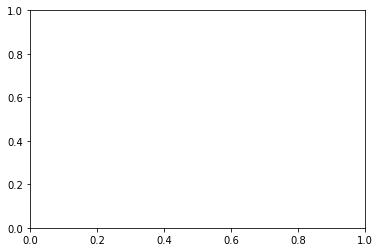

In [217]:
plt.scatter(X, Y, c = (0.5, 0, 0.8))
plt.plot(X,H,c="r")
plt.show()